 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
# Reading whale returns
path_whale = Path("../20210310-fintech-homework-a-whale-off-the-port/Resources/whale_returns.csv")
returns_whale = pd.read_csv(path_whale, parse_dates = True, index_col = "Date", infer_datetime_format = True)
returns_whale

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [3]:
# Count nulls
returns_whale.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
returns_whale = returns_whale.dropna().copy()
returns_whale.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [5]:
# Chrishan: Check sample of data in table
returns_whale

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [6]:
# Reading algorithmic returns
path_algo = Path("../20210310-fintech-homework-a-whale-off-the-port/Resources/algo_returns.csv")
returns_algo = pd.read_csv(path_algo, parse_dates = True, index_col = "Date", infer_datetime_format = True)
returns_algo

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [7]:
# Count nulls
returns_algo.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
"""
returns_algo["Algo 1"] = returns_algo["Algo 1"].fillna("Unknown")
returns_algo["Algo 2"] = returns_algo["Algo 2"].fillna("Unknown")
"""
returns_algo = returns_algo.dropna().copy()
returns_algo.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [9]:
# Chrishan: Check sample of data in table
returns_algo

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P TSX 60 Closing Prices
path_sp = Path("../20210310-fintech-homework-a-whale-off-the-port/Resources/sp_tsx_history.csv")
close_sp = pd.read_csv(path_sp, parse_dates = True, index_col = "Date", infer_datetime_format = True)
close_sp

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"
...,...
2019-12-20,"$17,118.44"
2019-12-23,"$17,128.71"
2019-12-24,"$17,180.15"


In [11]:
# Check Data Types
close_sp.dtypes

Close    object
dtype: object

In [12]:
# Fix Data Types
close_sp["Close"] = close_sp["Close"].str.replace("$", "")
close_sp["Close"] = close_sp["Close"].str.replace(",", "")
close_sp["Close"] = close_sp["Close"].astype("float")
close_sp.dtypes

<ipython-input-12-5ffde0a522de>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  close_sp["Close"] = close_sp["Close"].str.replace("$", "")


Close    float64
dtype: object

In [13]:
# Calculate Daily Returns
returns_sp = close_sp.pct_change()
returns_sp

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


In [14]:
# Drop nulls
"""
returns_sp["Close"] = returns_sp["Close"].fillna("Unknown")
"""
returns_sp = returns_sp.dropna().copy()
returns_sp.isnull().sum()

Close    0
dtype: int64

In [15]:
# Rename `Close` Column to be specific to this portfolio.
returns_sp = returns_sp.rename(columns={
    "Close": "S&P TSX",
})
returns_sp

,S&P TSX
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [16]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
returns_combined = pd.concat([returns_whale, returns_algo, returns_sp], axis="columns", join="inner")
returns_combined

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

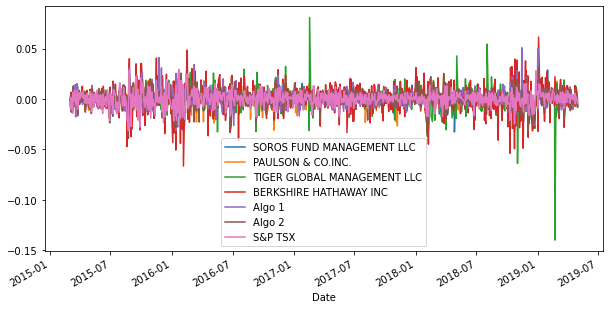

In [17]:
# Plot daily returns of all portfolios
returns_combined.plot(figsize = (10,5))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

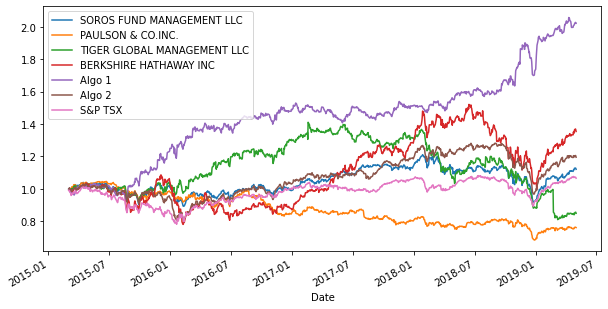

In [18]:
# Calculate cumulative returns of all portfolios
cumulative_returns_combined = (1 + returns_combined).cumprod()
# Plot cumulative returns
cumulative_returns_combined.plot(figsize = (10,5))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

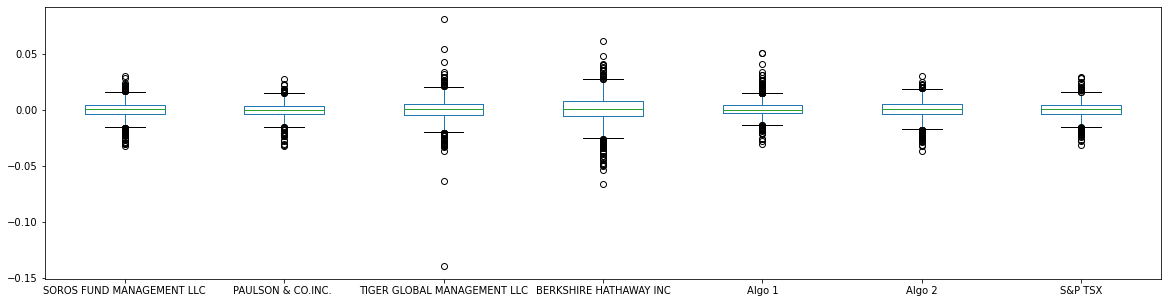

In [19]:
# Box plot to visually show risk (all)
returns_combined.plot.box(figsize = (20,5))

<AxesSubplot:>

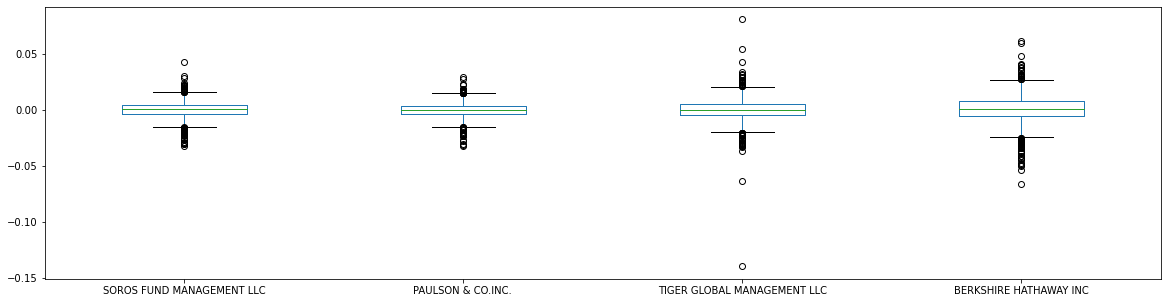

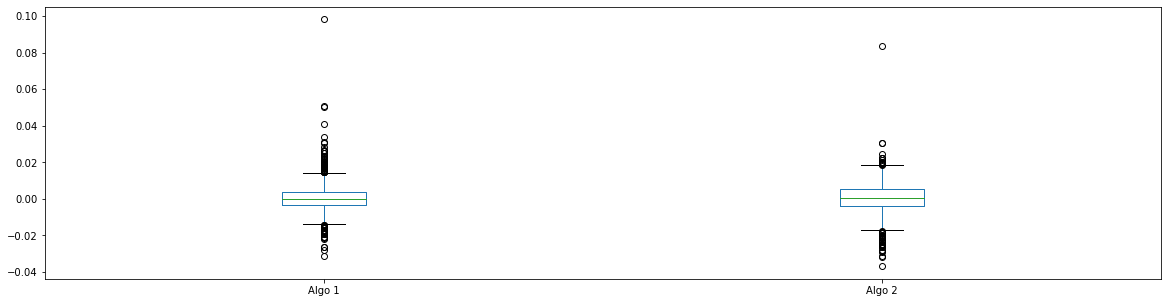

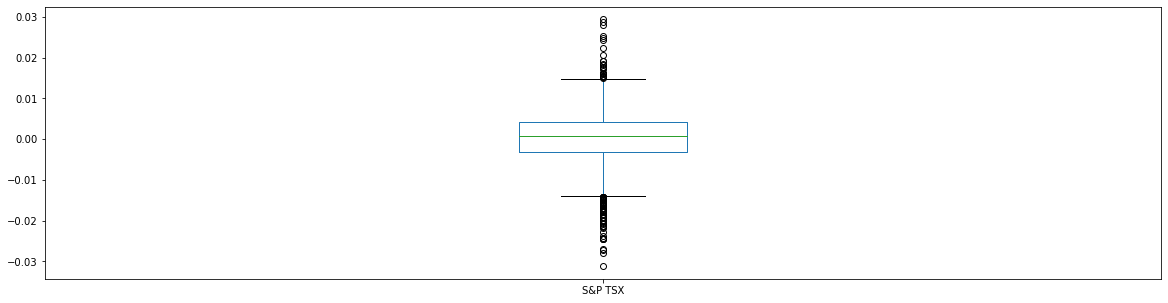

In [20]:
# Box plot to visually show risk (each)
returns_whale.plot.box(figsize = (20,5))
returns_algo.plot.box(figsize = (20,5))
returns_sp.plot.box(figsize = (20,5))

### Calculate Standard Deviations

In [57]:
# Calculate the daily standard deviations of all portfolios
daily_std_combined = returns_combined.std().sort_values(ascending = False)
daily_std_combined

BERKSHIRE HATHAWAY INC         0.012826
TIGER GLOBAL MANAGEMENT LLC    0.010883
Algo 2                         0.008326
SOROS FUND MANAGEMENT LLC      0.007828
Algo 1                         0.007589
S&P TSX                        0.007034
PAULSON & CO.INC.              0.006982
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [64]:
# Determine which portfolios are riskier than the S&P TSX 60
risky_portfolios = daily_std_combined[daily_std_combined.values > daily_std_combined["S&P TSX"]]
print("The below portfolios are riskier than the S&P TSX 60:")
for index, row in risky_portfolios.iteritems():
    print(index)

The below portfolios are riskier than the S&P TSX 60:
BERKSHIRE HATHAWAY INC
TIGER GLOBAL MANAGEMENT LLC
Algo 2
SOROS FUND MANAGEMENT LLC
Algo 1


### Calculate the Annualized Standard Deviation

In [62]:
# Calculate the annualized standard deviation (252 trading days) (all)
annualized_std_combined = (daily_std_combined * np.sqrt(252)).sort_values(ascending = False)
annualized_std_combined

BERKSHIRE HATHAWAY INC         0.203599
TIGER GLOBAL MANAGEMENT LLC    0.172759
Algo 2                         0.132177
SOROS FUND MANAGEMENT LLC      0.124259
Algo 1                         0.120470
S&P TSX                        0.111664
PAULSON & CO.INC.              0.110841
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P TSX 60 using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [24]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
returns_combined.rolling(window = 21).std().tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2019-04-25,0.004145,0.005572,0.004917,0.006641,0.005801,0.005764,0.003370
2019-04-26,0.004117,0.005649,0.005424,0.006599,0.005562,0.005700,0.003321
2019-04-29,0.004123,0.005374,0.005438,0.006584,0.005251,0.005622,0.003356
2019-04-30,0.004199,0.005408,0.005419,0.006323,0.005294,0.005600,0.003240
2019-05-01,0.004271,0.005009,0.005744,0.006143,0.004972,0.005686,0.003150


<AxesSubplot:xlabel='Date'>

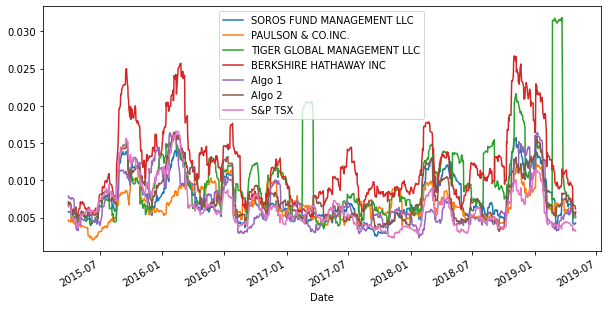

In [25]:
# Plot the rolling standard deviation
returns_combined.rolling(window = 21).std().plot(figsize = (10,5))

### Calculate and plot the correlation

In [26]:
# Calculate the correlation (daily returns)
correlation = returns_combined.corr()
# Display de correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


<AxesSubplot:>

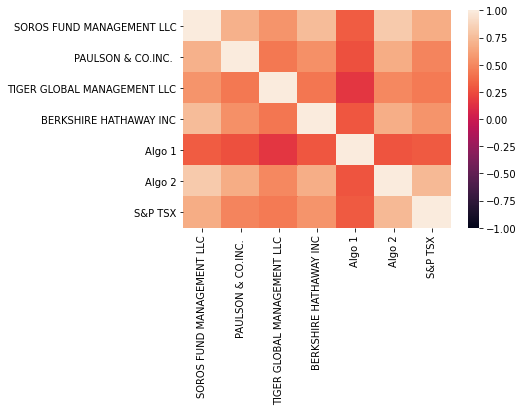

In [27]:
# Chrishan: Display correlation matrix heatmap
sns.heatmap(correlation, vmin = -1, vmax = 1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [28]:
# Calculate covariance of a single portfolio
covariance_algo1 = returns_combined['Algo 1'].cov(returns_combined['S&P TSX'])
covariance_algo1

1.6563000308911385e-05

In [29]:
# Calculate variance of S&P TSX
variance_sp = returns_combined['S&P TSX'].var()
variance_sp

4.9479515915131015e-05

In [30]:
# Computing beta
beta_algo1 = covariance_algo1 / variance_sp
beta_algo1

0.3347445908185686

<AxesSubplot:title={'center':'Algo 1 Beta Trend'}, xlabel='Date'>

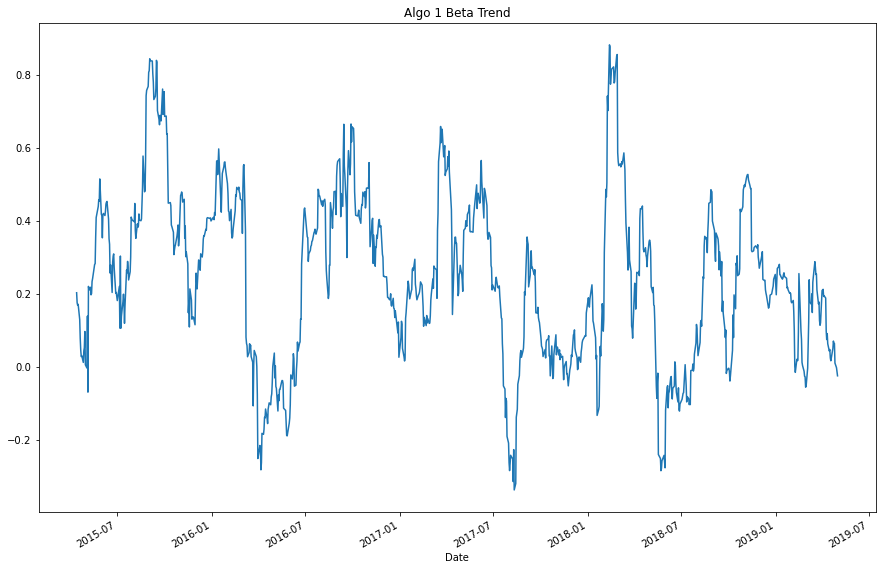

In [31]:
# Plot beta trend
# Chrishan: 30-Day Rolling Beta of Algo 1
rolling_covariance_algo1 = returns_combined['Algo 1'].rolling(window = 30).cov(returns_combined['S&P TSX'])
rolling_variance_algo1 = returns_combined['Algo 1'].rolling(window = 30).var()
rolling_beta_algo1 = rolling_covariance_algo1 / rolling_variance_algo1
rolling_beta_algo1.plot(figsize = (15,10), title = "Algo 1 Beta Trend")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [32]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [70]:
# Annualized Sharpe Ratios
path_rf = Path("../20210310-fintech-homework-a-whale-off-the-port/Resources/risk_free_rate.csv")
returns_rf = pd.read_csv(path_rf, parse_dates = True, index_col = "Date", infer_datetime_format = True)
returns_combined_rf = pd.concat([returns_combined, returns_rf], axis="columns", join="inner")
sharpe_ratios = (((returns_combined_rf.mean() - returns_combined_rf['rf_rate'].mean()) * 252) / (returns_combined_rf.std() * np.sqrt(252))).sort_values(ascending = False)
sharpe_ratios

Algo 1                         1.261160
BERKSHIRE HATHAWAY INC         0.365945
Algo 2                         0.204389
SOROS FUND MANAGEMENT LLC      0.115847
S&P TSX                        0.010658
rf_rate                        0.000000
TIGER GLOBAL MANAGEMENT LLC   -0.284988
PAULSON & CO.INC.             -0.756068
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

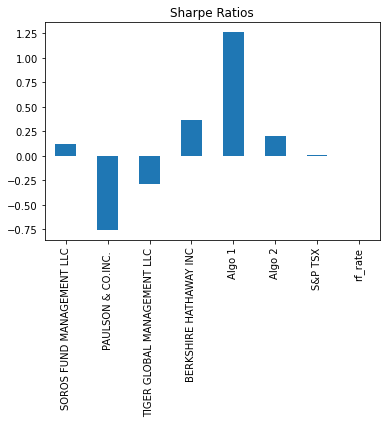

In [34]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = "bar", title = "Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

In [35]:
# The Algo 1 strategy outperformed the S&P TSX 60 and all the whale portfolios by having the best Sharpe ratio.  The Algo 2 strategy outperformed the S&P TSX 60 and all the whale portoflios except for Berkshire Hathaway.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

In [36]:
# Reading data from 1st stock
path_tsla = Path("../20210310-fintech-homework-a-whale-off-the-port/Resources/tsla_historical.csv")
close_tsla = pd.read_csv(path_tsla, parse_dates = True, index_col = "Date", infer_datetime_format = True)
close_tsla = close_tsla.rename(columns={"Close": "TSLA"})
close_tsla

,Symbol,TSLA
Date,,
2018-01-02 16:00:00,TSLA,64.11
2018-01-03 16:00:00,TSLA,63.45
2018-01-04 16:00:00,TSLA,62.92
2018-01-05 16:00:00,TSLA,63.32
2018-01-08 16:00:00,TSLA,67.28
...,...,...
2019-12-20 16:00:00,TSLA,81.12
2019-12-23 16:00:00,TSLA,83.84
2019-12-24 13:00:00,TSLA,85.05


In [37]:
# Reading data from 2nd stock
path_amzn = Path("../20210310-fintech-homework-a-whale-off-the-port/Resources/amzn_historical.csv")
close_amzn = pd.read_csv(path_amzn, parse_dates = True, index_col = "Date", infer_datetime_format = True)
close_amzn = close_amzn.rename(columns={"Close": "AMZN"})
close_amzn

,Symbol,AMZN
Date,,
2018-01-02 16:00:00,AMZN,1189.01
2018-01-03 16:00:00,AMZN,1204.20
2018-01-04 16:00:00,AMZN,1209.59
2018-01-05 16:00:00,AMZN,1229.14
2018-01-08 16:00:00,AMZN,1246.87
...,...,...
2019-12-20 16:00:00,AMZN,1786.50
2019-12-23 16:00:00,AMZN,1793.00
2019-12-24 13:00:00,AMZN,1789.21


In [38]:
# Reading data from 3rd stock
path_aapl = Path("../20210310-fintech-homework-a-whale-off-the-port/Resources/aapl_historical.csv")
close_aapl = pd.read_csv(path_aapl, parse_dates = True, index_col = "Date", infer_datetime_format = True)
close_aapl = close_aapl.rename(columns={"Close": "AAPL"})
close_aapl

,Symbol,AAPL
Date,,
2018-01-02 16:00:00,AAPL,43.07
2018-01-03 16:00:00,AAPL,43.06
2018-01-04 16:00:00,AAPL,43.26
2018-01-05 16:00:00,AAPL,43.75
2018-01-08 16:00:00,AAPL,43.59
...,...,...
2019-12-20 16:00:00,AAPL,69.86
2019-12-23 16:00:00,AAPL,71.00
2019-12-24 13:00:00,AAPL,71.07


In [39]:
# Combine all stocks in a single DataFrame
close_custom = pd.concat([close_tsla, close_amzn, close_aapl], axis="columns", join="inner")
close_custom

,Symbol,TSLA,Symbol,AMZN,Symbol,AAPL
Date,,,,,,
2018-01-02 16:00:00,TSLA,64.11,AMZN,1189.01,AAPL,43.07
2018-01-03 16:00:00,TSLA,63.45,AMZN,1204.20,AAPL,43.06
2018-01-04 16:00:00,TSLA,62.92,AMZN,1209.59,AAPL,43.26
2018-01-05 16:00:00,TSLA,63.32,AMZN,1229.14,AAPL,43.75
2018-01-08 16:00:00,TSLA,67.28,AMZN,1246.87,AAPL,43.59
...,...,...,...,...,...,...
2019-12-20 16:00:00,TSLA,81.12,AMZN,1786.50,AAPL,69.86
2019-12-23 16:00:00,TSLA,83.84,AMZN,1793.00,AAPL,71.00
2019-12-24 13:00:00,TSLA,85.05,AMZN,1789.21,AAPL,71.07


In [40]:
# Reorganize portfolio data by having a column per symbol
close_custom = close_custom.drop(columns=["Symbol"])
close_custom

,TSLA,AMZN,AAPL
Date,,,
2018-01-02 16:00:00,64.11,1189.01,43.07
2018-01-03 16:00:00,63.45,1204.20,43.06
2018-01-04 16:00:00,62.92,1209.59,43.26
2018-01-05 16:00:00,63.32,1229.14,43.75
2018-01-08 16:00:00,67.28,1246.87,43.59
...,...,...,...
2019-12-20 16:00:00,81.12,1786.50,69.86
2019-12-23 16:00:00,83.84,1793.00,71.00
2019-12-24 13:00:00,85.05,1789.21,71.07


In [41]:
# Calculate daily returns
returns_custom = close_custom.pct_change()
returns_custom

,TSLA,AMZN,AAPL
Date,,,
2018-01-02 16:00:00,NaN,NaN,NaN
2018-01-03 16:00:00,-0.010295,0.012775,-0.000232
2018-01-04 16:00:00,-0.008353,0.004476,0.004645
2018-01-05 16:00:00,0.006357,0.016163,0.011327
2018-01-08 16:00:00,0.062539,0.014425,-0.003657
...,...,...,...
2019-12-20 16:00:00,0.003836,-0.003225,-0.002143
2019-12-23 16:00:00,0.033531,0.003638,0.016318
2019-12-24 13:00:00,0.014432,-0.002114,0.000986


In [42]:
# Drop NAs
returns_custom = returns_custom.dropna().copy()
returns_custom.isnull().sum()

TSLA    0
AMZN    0
AAPL    0
dtype: int64

In [43]:
# Display sample data
returns_custom.index = returns_custom.index.normalize()
returns_custom

,TSLA,AMZN,AAPL
Date,,,
2018-01-03,-0.010295,0.012775,-0.000232
2018-01-04,-0.008353,0.004476,0.004645
2018-01-05,0.006357,0.016163,0.011327
2018-01-08,0.062539,0.014425,-0.003657
2018-01-09,-0.008026,0.004676,-0.000229
...,...,...,...
2019-12-20,0.003836,-0.003225,-0.002143
2019-12-23,0.033531,0.003638,0.016318
2019-12-24,0.014432,-0.002114,0.000986


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [44]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
returns_portfolio = pd.Series((returns_custom.dot(weights)), name = "Chrishan's Portfolio")

# Display sample data
returns_portfolio

Date
2018-01-03    0.000749
2018-01-04    0.000256
2018-01-05    0.011282
2018-01-08    0.024436
2018-01-09   -0.001193
                ...   
2019-12-20   -0.000510
2019-12-23    0.017829
2019-12-24    0.004435
2019-12-26    0.025903
2019-12-27   -0.000380
Name: Chrishan's Portfolio, Length: 500, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [45]:
# Join your returns DataFrame to the original returns DataFrame
returns_all = pd.concat([returns_portfolio, returns_combined], axis="columns", join="inner")
returns_all

,Chrishan's Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,,
2018-01-03,0.000749,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774
2018-01-04,0.000256,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528
2018-01-05,0.011282,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869
2018-01-08,0.024436,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944
2018-01-09,-0.001193,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097
...,...,...,...,...,...,...,...,...
2019-04-25,-0.017114,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,-0.009906,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.007302,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


In [47]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
returns_all = returns_all.dropna().copy()

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [71]:
# Calculate the annualized `std`
std_all = returns_all.std().sort_values(ascending = False)
annualized_std_all = std_all * np.sqrt(252)
annualized_std_all

Chrishan's Portfolio           0.301855
BERKSHIRE HATHAWAY INC         0.227445
TIGER GLOBAL MANAGEMENT LLC    0.219833
SOROS FUND MANAGEMENT LLC      0.145675
Algo 2                         0.137664
Algo 1                         0.120028
PAULSON & CO.INC.              0.114343
S&P TSX                        0.099121
dtype: float64

### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualzied Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!